
# Project: Investigate a Dataset - [GapMinder World Data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

(1) Overview of dataset
> The Gapminder dataset contains data values on countries that have been collected over the years and from different sources. These data values show information about performance indicators for these countries. 

(2) Dataset brief description
> The dataset used for this analysis is downloaded from https://www.gapminder.org/data/. The columns are indicator values and they include: 
(Country, Year, Total Population, Total Energy Produced, Total Energy used, Income per person per capita, CO2 emissions(tonnes per person))


 


### **Question(s) for Analysis**

Question 1
> Who are the world's top CO2 emmitters, and how much energy do they produce and consume?. (Environmental Sustainability Analysis)

Question 2
> What is the pattern of Economic growth of countries over the years. Based on defined categorization of these countries into high, medium and low income countries; How has the growth pattern evolved?

 

In [1]:
#Import necessary modules
import numpy as np
from numpy import nan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;sns.set_theme()

%matplotlib inline


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Section 2.0 Data Wrangling & Cleaning


**(2.1) Step 1: Load dataset**
> - Load datasets into workspace from csv format into pandas dataframe. 
> - Inspect the dataframes






In [3]:
# Load data using pd.read_csv()

total_pop_df = pd.read_csv('population_total.csv') #-- Total Population --#
total_energy_prod_df = pd.read_csv('energy_production_total.csv') #-- Total Energy Produced --#
total_energy_use_df = pd.read_csv('energy_use_per_person.csv') #-- Total Energy used --#
income_per_person_df = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv') #--Income per Person
co2_emissions_df = pd.read_csv('co2_emissions_tonnes_per_person.csv') #-- Co2 emissions --#   

In [4]:
# inspect the dataframes

total_pop_df.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,...,76.6M,76.4M,76.3M,76.1M,76M,75.8M,75.6M,75.4M,75.2M,74.9M
1,Angola,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,...,168M,170M,172M,175M,177M,179M,182M,184M,186M,188M
2,Albania,400k,402k,404k,405k,407k,409k,411k,413k,414k,...,1.33M,1.3M,1.27M,1.25M,1.22M,1.19M,1.17M,1.14M,1.11M,1.09M
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,63k,62.9k,62.9k,62.8k,62.7k,62.7k,62.6k,62.5k,62.5k,62.4k
4,United Arab Emirates,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,...,12.3M,12.4M,12.5M,12.5M,12.6M,12.7M,12.7M,12.8M,12.8M,12.9M


**Initial inspection shows loaded dataframe has row values placed as columns.**
Step 2 
> - Reshape dataframe have indicator values appear as column instead of initial horizontal rows setup.
> - Using pandas .melt function

In [5]:
#Melt function: to reshape dataframe.

total_pop_df = pd.melt(total_pop_df, id_vars ='country', var_name='years', value_name='population_total') 
total_energy_prod_df = pd.melt(total_energy_prod_df, id_vars ='country', var_name='years', value_name='total_energyprod') 
total_energy_use_df = pd.melt(total_energy_use_df, id_vars ='country', var_name='years', value_name='total_energyuse')
income_per_person_df = pd.melt(income_per_person_df, id_vars ='country', var_name='years', value_name='total_income_person')
co2_emissions_df = pd.melt(co2_emissions_df, id_vars ='country', var_name='years', value_name='total_co2_emmissions')



In [6]:
#inspect again to check

total_pop_df.head()

,country,years,population_total
0,Afghanistan,1800,3.28M
1,Angola,1800,1.57M
2,Albania,1800,400k
3,Andorra,1800,2650
4,United Arab Emirates,1800,40.2k


In [7]:
#list of dataframes to be used in the join step below

list_dataframes = [total_pop_df, total_energy_prod_df,  total_energy_use_df,
                  income_per_person_df, co2_emissions_df]

Step 3:
> - Join the individual datasets into one central dataframe.
> - Join using pandas merge and functools reduce function to join all datasets by (outer) method in one loop.

In [8]:
#join all datasets to one dataframe
#join on country and years axis

#import reduce function from functools to merge multiple dataframes
from functools import reduce #(reference: https://stackoverflow.com/questions/44327999/python-pandas-merge-multiple-dataframes)

#gapminder_df is the main dataframe comprising all individual datasets.
gapminder_df = reduce(lambda  left,right: pd.merge(left,right,on=['country', 'years'],
                                            how='outer'), list_dataframes)



In [9]:
#inspect newly joined dataframe

gapminder_df.columns
gapminder_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 59465 entries, 0 to 59464
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   country               59465 non-null  object
 1   years                 59465 non-null  object
 2   population_total      59297 non-null  object
 3   total_energyprod      5111 non-null   object
 4   total_energyuse       6070 non-null   object
 5   total_income_person   48945 non-null  object
 6   total_co2_emmissions  18237 non-null  object
dtypes: object(7)
memory usage: 3.6+ MB


**STEP 4: Cleaning the dataframe (gapminder_df)**
> - Filter years column values to include range of years only between (1960) and (2010)
> - Reason for the above is to make the data uniform as some of the datasets only have data values from 1960
> - Convert the years column data type to integer to allow filtering.

In [10]:
#clean dataframe to include only years from 1960 - 2010

#turn years column to integer
gapminder_df['years'] = gapminder_df['years'].astype(int)

#drop rows with years value between 1800 and 1959 and values after 2010
#----

#drop years below 1960
gapminder_df.drop(gapminder_df[(gapminder_df['years'] < 1960)].index, inplace = True)

#drop years after 2010
gapminder_df.drop(gapminder_df[(gapminder_df['years'] > 2010)].index, inplace = True)
    
    
#updated dataframe now includes only dates between (1960 and 2010)
gapminder_df

,country,years,population_total,total_energyprod,total_energyuse,total_income_person,total_co2_emmissions
31520,Afghanistan,1960,9M,NaN,NaN,1540,0.046
31521,Angola,1960,5.45M,NaN,NaN,2320,0.101
31522,Albania,1960,1.64M,NaN,NaN,2690,1.24
31523,Andorra,1960,13.4k,NaN,NaN,17.2k,NaN
31524,United Arab Emirates,1960,92.4k,NaN,NaN,41.6k,0.119
...,...,...,...,...,...,...,...
59445,Curaçao,2008,NaN,NaN,15.3k,NaN,NaN
59446,Kosovo,2009,NaN,NaN,1380,NaN,NaN
59447,Curaçao,2009,NaN,NaN,15.6k,NaN,NaN
59448,Kosovo,2010,NaN,NaN,1410,NaN,NaN


In [11]:
# assess dataframe datatypes
gapminder_df.info()





<class 'pandas.core.frame.DataFrame'>
Int64Index: 10200 entries, 31520 to 59449
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   country               10200 non-null  object
 1   years                 10200 non-null  int64 
 2   population_total      10047 non-null  object
 3   total_energyprod      5111 non-null   object
 4   total_energyuse       5475 non-null   object
 5   total_income_person   9945 non-null   object
 6   total_co2_emmissions  9471 non-null   object
dtypes: int64(1), object(6)
memory usage: 637.5+ KB


**STEP 5: Cleaning (continues)**
> - Assesing the datatypes in the cell above shows null values in some of the rows and need to convert object type to integer or floats
> - Dropping null values from dataframe to allow to change datatypes.
> - Decision to drop null values direct is because of big gap in missing data that does not allow for forward fill or backward fill. 
> - Also, Datatypes could not be converted to appropraiate (int or float) before being able to use mean value to fill

In [12]:
#drop nan values

gapminder_df = gapminder_df.dropna()



In [13]:
#inspecting the data types after dropping nulls

gapminder_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5067 entries, 31528 to 41556
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   country               5067 non-null   object
 1   years                 5067 non-null   int64 
 2   population_total      5067 non-null   object
 3   total_energyprod      5067 non-null   object
 4   total_energyuse       5067 non-null   object
 5   total_income_person   5067 non-null   object
 6   total_co2_emmissions  5067 non-null   object
dtypes: int64(1), object(6)
memory usage: 316.7+ KB


**Conversion of datatypes**
> - change population_total to integer
> - total_energyprod to integer
> - total_energyuse to integer
> - total_income_person to integer
> - total_co2_emissions to float


#using pandas pd.eval and df.replace functions 


#(reference code: https://stackoverflow.com/questions/39684548/convert-the-string-2-90k-to-2900-or-5-2m-to-5200000-in-pandas-dataframe)


In [14]:
#conversion to int.

for col in ['population_total', 'total_energyprod', 'total_energyuse', 'total_income_person']:
    gapminder_df.loc[:,col] = gapminder_df.loc[:,col].replace({'k': '*1e3', 'M': '*1e6', 'B': '*1e9', 'TR': '*1e12'}, regex=True).map(pd.eval).astype(int)

#The above function gives a (setting with copy warning). but does not affect the results. 
#all efforts to correct the warning has not been succesful for now.
    

/var/folders/cd/wkcp1_2s31d6dh1rljm3w7740000gn/T/ipykernel_4594/1252553382.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gapminder_df.loc[:,col] = gapminder_df.loc[:,col].replace({'k': '*1e3', 'M': '*1e6', 'B': '*1e9', 'TR': '*1e12'}, regex=True).map(pd.eval).astype(int)


In [15]:
#coversion to float 

for col in ['total_co2_emmissions']:
    gapminder_df[col] = gapminder_df[col].astype(float)

#same comment as above (setting with copy warning)

/var/folders/cd/wkcp1_2s31d6dh1rljm3w7740000gn/T/ipykernel_4594/799600278.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gapminder_df[col] = gapminder_df[col].astype(float)


In [16]:
#inspecting the datatypes now gives desired results

gapminder_df.dtypes


country                  object
years                     int64
population_total          int64
total_energyprod          int64
total_energyuse           int64
total_income_person       int64
total_co2_emmissions    float64
dtype: object

In [17]:
#Assessing the cleaned dataset for statistical information

gapminder_df.describe()

,years,population_total,total_energyprod,total_energyuse,total_income_person,total_co2_emmissions
count,5067.000000,5.067000e+03,5.067000e+03,5067.000000,5067.000000,5067.000000
mean,1989.671403,4.016985e+07,6.633652e+04,2263.370041,16754.090191,6.046246
std,12.497216,1.306740e+08,1.969905e+05,2599.199654,18607.932820,8.179148
min,1960.000000,1.190000e+05,0.000000e+00,86.000000,400.000000,0.004650
25%,1980.000000,4.110000e+06,2.515000e+03,515.000000,4155.000000,0.850000
50%,1991.000000,9.940000e+06,1.040000e+04,1230.000000,10300.000000,3.530000
75%,2000.000000,3.030000e+07,4.590000e+04,3120.000000,22800.000000,8.350000
max,2010.000000,1.360000e+09,2.080000e+06,22100.000000,157000.000000,87.700000


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1:
**Who are the world's top CO2 emmitters, and how much energy do they produce and consume?. (Environmental Sustainability Analysis)**

In [18]:
# First check for correlation in dataset
# useful to get insights on indicators that share a relationship 
#and might be interesting to analyse


gapminder_df.corr()


,years,population_total,total_energyprod,total_energyuse,total_income_person,total_co2_emmissions
years,1.000000,0.040071,0.057809,0.069903,0.112678,-0.032339
population_total,0.040071,1.000000,0.559192,-0.071393,-0.100520,-0.065664
total_energyprod,0.057809,0.559192,1.000000,0.229126,0.124974,0.201617
total_energyuse,0.069903,-0.071393,0.229126,1.000000,0.771686,0.849708
total_income_person,0.112678,-0.100520,0.124974,0.771686,1.000000,0.788899
total_co2_emmissions,-0.032339,-0.065664,0.201617,0.849708,0.788899,1.000000


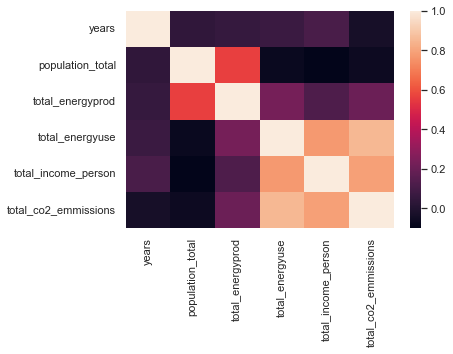

In [19]:
#using seaborn module to visualize correlation between indicators

corr_gapminder = sns.heatmap(gapminder_df.corr())

**Correlation inquire results**

- Results from the two cells above show strong correlation between: (Total energy use, total income person in relation to co2 emissions) 

**Question 1 solution steps**

STEP 1
> - Analyse the co2 emissions in the most recent year.
> - The most recent year with maximum number of countries is selected

In [20]:
#Find the most recent year with max number of countries available for analysis

gapminder_df.groupby('years')['country'].nunique()



years
1960     25
1961     25
1962     25
1963     25
1964     25
1965     26
1966     26
1967     26
1968     26
1969     26
1970     26
1971    109
1972    109
1973    109
1974    109
1975    109
1976    109
1977    109
1978    109
1979    109
1980    109
1981    110
1982    110
1983    110
1984    110
1985    111
1986    111
1987    111
1988    111
1989    111
1990    131
1991    132
1992    131
1993    131
1994    132
1995    134
1996    134
1997    134
1998    134
1999    134
2000    134
2001    134
2002    134
2003    134
2004    134
2005    134
2006    134
2007    134
2008    134
2009    134
2010     34
Name: country, dtype: int64

In [21]:
#Result of query in previous cell shows year 2009 fit our description
#year 2009 == most recent + 134 countries included.

#Now query to create new dataframe with year == 2009 exclusive

df_2009 = gapminder_df.query('years == 2009').reset_index(drop=True)
df_2009

,country,years,population_total,total_energyprod,total_energyuse,total_income_person,total_co2_emmissions
0,Angola,2009,22500000,101000,515,7760,1.230
1,Albania,2009,2970000,1250,732,10300,1.470
2,United Arab Emirates,2009,7920000,169000,7570,58400,20.900
3,Argentina,2009,40500000,80800,1870,21500,4.420
4,Armenia,2009,2890000,825,904,9050,1.510
...,...,...,...,...,...,...,...
129,Vietnam,2009,87100000,76600,609,4830,1.410
130,Yemen,2009,22500000,15200,359,5340,1.080
131,South Africa,2009,50500000,161000,2850,13400,9.960
132,Zambia,2009,13200000,7240,601,2920,0.182


In [22]:
#to describe the 2009 data frame to observe statistical info

df_2009[['total_energyprod','total_energyuse', 'total_co2_emmissions']].describe()

,total_energyprod,total_energyuse,total_co2_emmissions
count,1.340000e+02,134.000000,134.000000
mean,9.082369e+04,2514.858209,5.826346
std,2.611105e+05,2884.513746,6.816449
min,1.000000e+00,193.000000,0.027200
25%,3.572500e+03,624.000000,1.237500
50%,1.520000e+04,1490.000000,3.855000
75%,6.742500e+04,3150.000000,8.087500
max,2.080000e+06,16900.000000,41.500000


**(Co2 emissions Solution) STEP 2**
> - Query dataframe to pick top 25% of co2 emitters
> - Plotting the top 25% emitters against the energy used and produced; to observe the pattern.

In [23]:
# value for 75% percentile in co2_emissions colomn from describe call in cell above.

top25_co2 = 8.087500  


In [24]:
#query dataframe to pick top 25% of co2 emitters

co2_top25_df = df_2009.query(f'total_co2_emmissions >= {top25_co2} ').reset_index(drop=True)
co2_top25_df 

,country,years,population_total,total_energyprod,total_energyuse,total_income_person,total_co2_emmissions
0,United Arab Emirates,2009,7920000,169000,7570,58400,20.90
1,Australia,2009,21800000,311000,5860,44600,18.80
2,Austria,2009,8369999,11400,3800,51000,8.10
3,Belgium,2009,10900000,15300,5200,47100,9.93
4,Bahrain,2009,1190000,17600,10300,44800,23.70
5,Brunei,2009,384000,18900,7930,66900,20.20
6,Canada,2009,33700000,390000,7800,44000,16.10
7,Czech Republic,2009,10500000,31200,4030,32800,11.00
8,Germany,2009,80900000,127000,3790,45000,9.76
9,Denmark,2009,5530000,23900,3330,50100,8.84


**- Results from the top 25% query above returns 33 countries**

**- To further reduce the size to visualize just the top 15 countries.**

In [25]:
#Using pandas .nlargest to get top 15 co2 emitters

top15_co2_emitters_df = co2_top25_df.nlargest(15, 'total_co2_emmissions').reset_index(drop=True)
top15_co2_emitters_df
top15_co2_emitters_df['country'].unique()

array(['Qatar', 'Trinidad and Tobago', 'Kuwait', 'Bahrain', 'Luxembourg',
       'United Arab Emirates', 'Brunei', 'Australia', 'United States',
       'Saudi Arabia', 'Canada', 'Oman', 'Kazakhstan', 'Iceland',
       'Singapore'], dtype=object)

**(Top CO2 emitters Solution steps)**
> - Plotting the energy used and energy produced values to get insights.
> - plots using matplotlib library

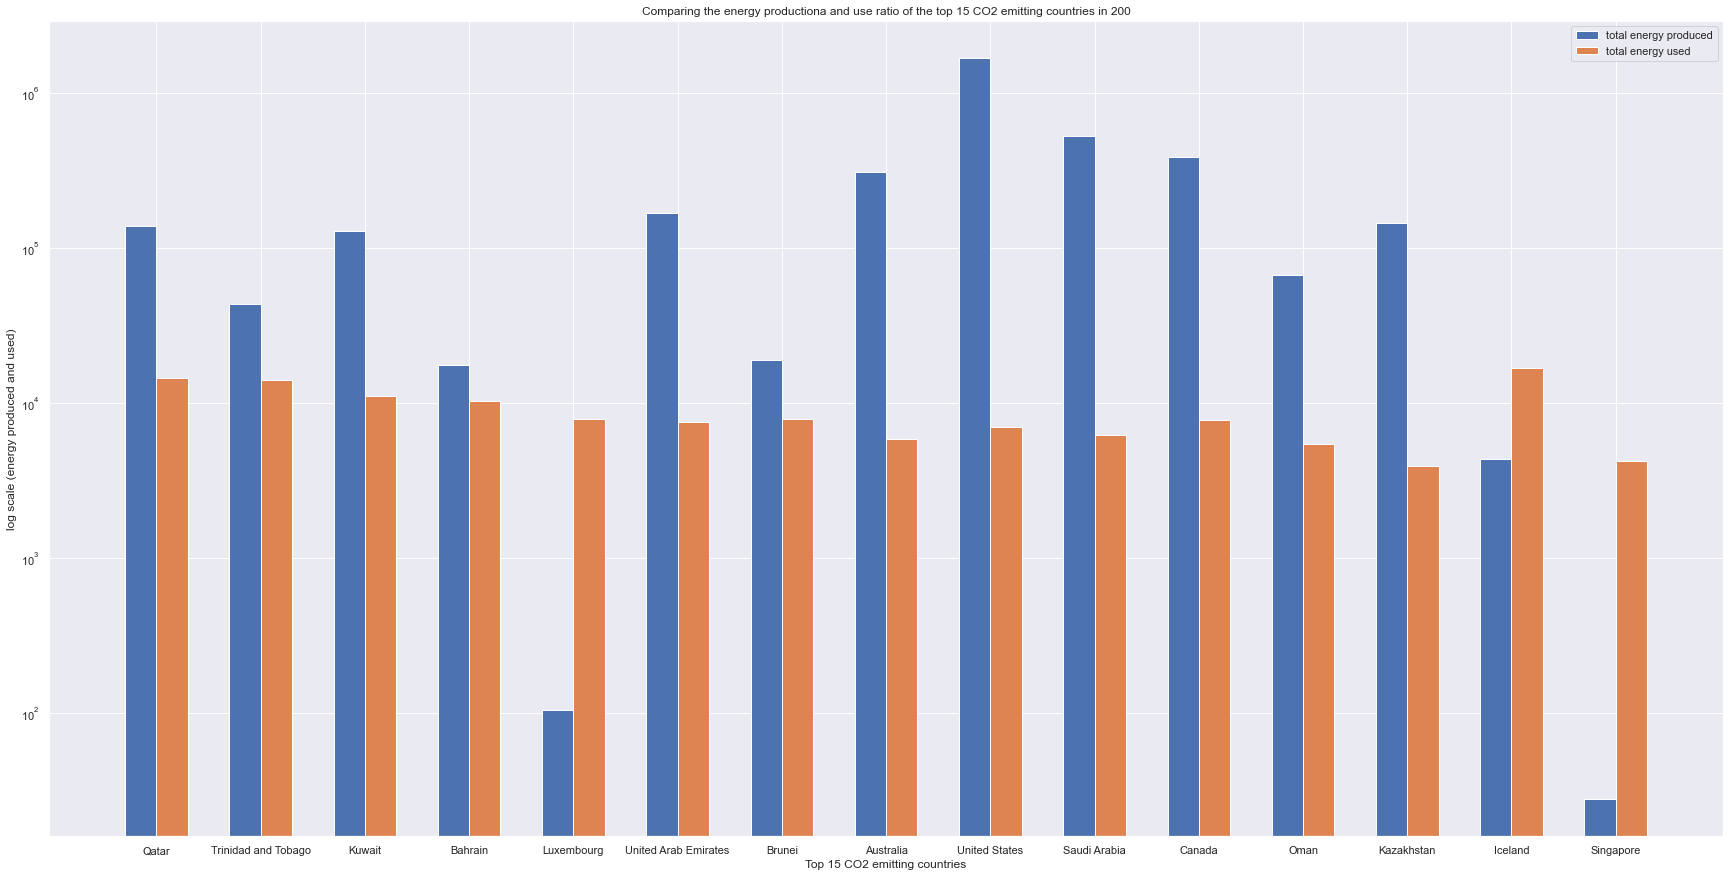

In [26]:
#defining the x and y axis for the plots

x_axis = top15_co2_emitters_df['country']
y1_axis = top15_co2_emitters_df['total_energyprod']
y2_axis = top15_co2_emitters_df['total_energyuse']


# barplot set up in pairs of (energy produced and energy use)
num_barpairs =15    #number of barpairs wanted (9 countries)

# Position of bars on x-axis
bar_position = np.arange(num_barpairs)

# Width of a bar 
width = 0.3

#plot size 
plt.figure(figsize=(30, 15))

# Plotting
plt.bar(bar_position, y1_axis, width, label = 'total energy produced')
plt.bar(bar_position + width, y2_axis, width, label = 'total energy used')


plt.xlabel('Top 15 CO2 emitting countries')
plt.ylabel('log scale (energy produced and used)')
plt.title('Comparing the energy productiona and use ratio of the top 15 CO2 emitting countries in 200')


#plot in log scale to adjust the extreme plot of some values.
plt.yscale('log') 


plt.xticks(bar_position + width / 2, (top15_co2_emitters_df['country']))

# Finding the best position for legends and putting it
plt.legend(loc='best')

plt.show()

**Results and Discussion for Question 1**

> Top 15 countries with highest co2 emissions in 2009 included :


['Qatar', 'Trinidad and Tobago', 'Kuwait', 'Bahrain', 'Luxembourg', 'United Arab Emirates', 'Brunei', 'Australia', 'United States','Saudi Arabia', 'Canada', 'Oman','Kazakhstan', 'Iceland','Singapore']


> - Results showed majority of the top co2 emitters produce more energy than they use.

> - Majority of the top co2 emitters are countries in Asia region. (The abduntant presence of oil in those regions might be responsible for that; since oil is a co2 emitting fuel) 

> - South Africa is the only African country present amongst the top 25% of co2 emitters.  (Could the relatively low level of economic prowress be a factor to this?, does gdp size of countries relate to how much co2 they emit?)

> - The above questions can be answered with further analysis.

> - The plot figures were made in log scale to make the plot uniform and regularize extreme values.

### Research Question 2  (Economic growth analysis)

**- What is the pattern of Economic growth of countries over the years. 
-Based on defined categorization of these countries into high, medium and low income countries; How has the growth pattern evolved?**

In [27]:
# check suitable range of years to analyse

gapminder_df.groupby('years')['country'].nunique()


years
1960     25
1961     25
1962     25
1963     25
1964     25
1965     26
1966     26
1967     26
1968     26
1969     26
1970     26
1971    109
1972    109
1973    109
1974    109
1975    109
1976    109
1977    109
1978    109
1979    109
1980    109
1981    110
1982    110
1983    110
1984    110
1985    111
1986    111
1987    111
1988    111
1989    111
1990    131
1991    132
1992    131
1993    131
1994    132
1995    134
1996    134
1997    134
1998    134
1999    134
2000    134
2001    134
2002    134
2003    134
2004    134
2005    134
2006    134
2007    134
2008    134
2009    134
2010     34
Name: country, dtype: int64

In [28]:
#.query to get countries in range (1995 - 2009)
#filter columns to make sure only countries represented in all the year ranges appear

df_1995_to_2009 = gapminder_df.query('years >= 1995 & years < 2010').reset_index(drop=True)

df_1995_to_2009

,country,years,population_total,total_energyprod,total_energyuse,total_income_person,total_co2_emmissions
0,Angola,1995,13900000,36400,456,1530,0.786
1,Albania,1995,3110000,1240,417,4470,0.670
2,United Arab Emirates,1995,2420000,137000,11500,56200,29.000
3,Argentina,1995,34800000,66900,1550,17400,3.670
4,Armenia,1995,3220000,245,511,3010,1.070
...,...,...,...,...,...,...,...
2005,Vietnam,2009,87100000,76600,609,4830,1.410
2006,Yemen,2009,22500000,15200,359,5340,1.080
2007,South Africa,2009,50500000,161000,2850,13400,9.960
2008,Zambia,2009,13200000,7240,601,2920,0.182


In [29]:
#Economic comparison
#create dataset for analysis from main df_1995_to_2009 dataset
Economic_analysis_df = df_1995_to_2009[['country','years','population_total', 'total_income_person' ]].copy()

Economic_analysis_df.describe()

,years,population_total,total_income_person
count,2010.000000,2.010000e+03,2010.000000
mean,2002.000000,4.526338e+07,18891.634328
std,4.321569,1.493323e+08,19580.486533
min,1995.000000,2.680000e+05,469.000000
25%,1998.000000,4.350000e+06,4420.000000
50%,2002.000000,1.030000e+07,10800.000000
75%,2006.000000,3.190000e+07,29250.000000
max,2009.000000,1.360000e+09,121000.000000


**#Create a metric to categorize countries based on economic levels**

> - #High level countries == countries in 75th percetile of total income per person
> - #Medium level countries == countries in 50th percetile of total income per person
> - #Low level countries == countries in 25thth percetile of total income per person


In [30]:
#---Metric to categorize countries based pn economic levels

high_income = 29250.000000
medium_income = 10800.000000
low_income = 4420.000000


#using numpy .where fucntion to filter row values based on economic value conditions

#- If income is greater or equal to high income metric, then assign string 'high' to new (economic_levels) columns
#- If income is less or equal to low income metric, then assign string 'low' to new (economic_levels) columns
#- else then assign string 'medium' to new (economic_levels) columns


Economic_analysis_df['economic_level'] = np.where(
    Economic_analysis_df['total_income_person'] >= high_income , 'high', 
                                                  np.where(Economic_analysis_df['total_income_person'] <= low_income , 'low', 'medium'))





In [31]:
#filter by economic level and take the mean of income

filtered_economic_df = Economic_analysis_df.groupby(['economic_level', 'years']).mean()
filtered_economic_df

population_total  total_income_person
economic_level years                                       
high           1995       2.791429e+07         43449.964286
               1996       2.852659e+07         43734.482759
               1997       2.871845e+07         45368.965517
               1998       2.794483e+07         45730.000000
               1999       2.757639e+07         46287.064516
               2000       2.709216e+07         47543.750000
               2001       2.678291e+07         47406.060606
               2002       2.758903e+07         48543.750000
               2003       2.762858e+07         48869.696970
               2004       2.646671e+07         49402.857143
               2005       2.623617e+07         49677.777778
               2006       2.636211e+07         50242.105263
               2007       2.594828e+07         50825.589744
               2008       2.555135e+07         49912.450000
               2009       2.705471e+07         48618.421053
low            1995       7.679000e+07          2435.428571
               1996       7.802905e+07          2593.380952
               1997       7.914390e+07          2623.634146
               1998       8.619795e+07          2607.230769
               1999       8.752821e+07          2689.179487
               2000       8.921947e+07          2729.736842
               2001       9.949471e+07          2640.558824
               2002       1.035497e+08          2652.090909
               2003       1.028062e+08          2763.470588
               2004       7.059774e+07          2699.806452
               2005       7.558724e+07          2674.896552
               2006       8.182148e+07          2628.888889
               2007       8.014964e+07          2780.535714
               2008       8.407292e+07          2563.250000
               2009       8.562917e+07          2629.041667
medium         1995       2.402628e+07         12228.281250
               1996       2.406656e+07         12335.873016
               1997       2.524492e+07         12626.875000
               1998       2.414318e+07         12340.615385
               1999       2.463392e+07         12180.000000
               2000       2.600412e+07         12281.250000
               2001       2.581099e+07         11777.462687
               2002       2.556129e+07         12212.318841
               2003       2.586793e+07         12560.597015
               2004       4.547357e+07         12383.970588
               2005       4.562935e+07         12555.797101
               2006       4.571362e+07         12610.144928
               2007       4.743701e+07         13264.626866
               2008       4.950757e+07         12996.571429
               2009       4.867625e+07         13042.361111

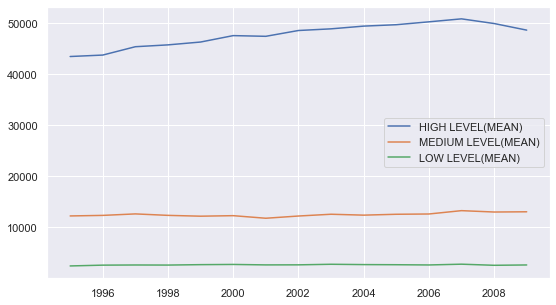

In [32]:
#plot to show trend of economic_level over the years

#setting x and y axis to compare economic levels over the year range of (1995 to 2009)

y1_grid = filtered_economic_df.iloc[0:15,1] #values for mean of high economic countries
y2_grid = filtered_economic_df.iloc[30:,1] #values for mean of medium economic countries
y3_grid = filtered_economic_df.iloc[15:30,1] #values for mean of low economic countries
x_grid = list(range(1995,2010))

#plot figure sizes
plt.figure(figsize=(9, 5))

#plotting
plt.plot(x_grid,y1_grid, label = 'HIGH LEVEL(MEAN)')
plt.plot(x_grid,y2_grid, label = 'MEDIUM LEVEL(MEAN)')
plt.plot(x_grid,y3_grid, label = 'LOW LEVEL(MEAN)')


plt.legend()
plt.show()

**Results and Discussion for Question 2**

> **Economic analysis of countries with respect to total income per person metric** :
>- No visible changes in trend of economic levels over the years. 

>- The relatioship between these economic levels has remained constant through the years (1995 - 2009)

>- It could be interesting to further analyze the changes of these economic levels compared with growth of population of the years. (it is possible that more or less people migrate into different levels of income).



<a id='conclusions'></a>
## Conclusions

**Limitation of research**
>1) The dropping of null values from the main dataframe in the cleaning phase distorted the amount of similar countries available per year. The quality of the initial dataset made it a little difficult to clean properly.

>2) Time constraint: In order to meet the Aug 09 deadline, Some other interesting analysis that could have been carried out were dropped.


**References to resources consulted to debug during the project**
> - https://pandas.pydata.org/docs/
> - https://stackoverflow.com/
> - https://www.geeksforgeeks.org/python-pandas-dataframe-groupby/
> - Youtube video (tutorials)



In [33]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/opt/anaconda3/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/opt/anaconda3/lib/python3.9/site-packages/nbconvert/__main__.py", line 2, in <module>
    main()
  File "/opt/anaconda3/lib/python3.9/site-packages/jupyter_core/application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "/opt/anaconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
    app.start()
  File "/opt/anaconda3/lib/python3.9/site-packages/nbconvert/nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "/opt/anaconda3/lib/python3.9/site-packages/nbconvert/nbconvertapp.py", line 529, in convert_notebooks
    raise ValueError(
ValueError: Please specify an output format with '--to <format>'.
The followin

1